In [23]:
import numpy as np
import pandas as pd
# from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# from tensorflow.keras.models import Model, Sequential
# from tensorflow.keras.layers import Dense, Dropout, Input, Embedding, Flatten, Concatenate, Add, BatchNormalization
# from tensorflow.keras.optimizers import Adam


from fastai.tabular import *
from fastai import *
from fastai.callbacks import SaveModelCallback

In [2]:
data = pd.read_csv(r'../data/df_final.csv')
data.sort_values(by='fecha_hora', inplace=True)

# Select columns with dtype 'object' (strings)
data['fecha_hora'] = pd.to_datetime(data['fecha_hora'])
str_cols = data.select_dtypes(include='object').columns

# Convert columns with "," decimal separator to floats
for col in str_cols:
    try:
        # Replace commas with dots and convert to float
        data[col] = data[col].str.replace(',', '.').astype(float)
    except ValueError:
        # Skip columns that cannot be converted
        print(f"Column {col} could not be converted to float. Skipping...")
        

data

,fecha_hora,cmg,demanda,gx_Eólicas_Antofagasta,gx_Eólicas_Araucanía,gx_Eólicas_Atacama,gx_Eólicas_Biobío,gx_Eólicas_Coquimbo,gx_Eólicas_Los Lagos,gx_Eólicas_O’Higgins,...,emb_COLBUN,emb_INVERNADA,emb_LAJA,emb_MACHICURA,emb_MAULE,emb_MELADO,emb_PANGUE,emb_POLCURA,emb_RALCO,emb_RAPEL
0,2019-01-01 00:00:00,55.52,7992.914520,89.92,71.65,26.40,57.09,459.92,26.54,3.03,...,434.08,1317.56,1327.24,256.99,2162.65,643.47,509.02,735.55,715.75,103.52
1,2019-01-01 01:00:00,55.52,7948.664819,72.62,79.50,10.70,58.19,388.12,22.47,1.76,...,434.08,1317.50,1327.24,256.92,2162.65,643.63,508.90,735.57,715.75,103.52
2,2019-01-01 02:00:00,55.52,7752.115956,35.16,77.97,1.90,48.44,304.78,13.95,0.65,...,434.07,1317.51,1327.24,256.85,2162.65,643.79,508.81,735.60,715.73,103.52
3,2019-01-01 03:00:00,55.52,7523.577425,17.75,66.52,0.00,39.39,252.67,13.50,1.51,...,434.06,1317.55,1327.24,256.78,2162.65,643.94,508.74,735.62,715.73,103.52
4,2019-01-01 04:00:00,55.52,7308.782546,8.89,51.07,0.00,41.75,278.55,15.77,3.25,...,434.06,1317.52,1327.24,256.71,2162.65,644.08,508.75,735.62,715.73,103.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48131,2024-06-28 15:00:00,0.00,9228.687500,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,428.25,1306.16,1330.09,257.15,2166.86,645.91,508.77,735.03,721.98,104.52
48132,2024-06-28 16:00:00,9.03,9903.786133,474.64,262.98,127.24,288.62,286.39,5.97,36.77,...,428.22,1306.16,1330.09,257.16,2166.86,645.92,508.71,735.07,722.04,104.53
48133,2024-06-28 17:00:00,35.36,10463.607422,494.72,477.75,74.94,317.90,178.76,6.89,69.48,...,428.23,1306.18,1330.09,257.17,2166.86,645.83,508.72,734.94,722.07,104.50
48134,2024-06-28 18:00:00,69.48,10986.050781,303.65,654.46,28.13,365.90,85.30,2.12,71.48,...,428.23,1306.16,1330.09,257.16,2166.86,645.78,508.71,734.92,722.07,104.51


In [3]:
data['year'] = data['fecha_hora'].dt.year
data['month'] = data['fecha_hora'].dt.month
data['day'] = data['fecha_hora'].dt.day
data['day_of_week'] = data['fecha_hora'].dt.dayofweek  # Monday=0, Sunday=6
data['hour'] = data['fecha_hora'].dt.hour  # ISO week number

In [4]:
data.to_csv(r'../data/df_final_metadata.csv', index=False)

In [5]:
data.columns

Index(['fecha_hora', 'cmg', 'demanda', 'gx_Eólicas_Antofagasta',
       'gx_Eólicas_Araucanía', 'gx_Eólicas_Atacama', 'gx_Eólicas_Biobío',
       'gx_Eólicas_Coquimbo', 'gx_Eólicas_Los Lagos', 'gx_Eólicas_O’Higgins',
       ...
       'emb_MELADO', 'emb_PANGUE', 'emb_POLCURA', 'emb_RALCO', 'emb_RAPEL',
       'year', 'month', 'day', 'day_of_week', 'hour'],
      dtype='object', length=111)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48136 entries, 0 to 48135
Columns: 111 entries, fecha_hora to hour
dtypes: datetime64[ns](1), float64(105), int32(5)
memory usage: 39.8 MB


In [7]:
data_lite = data.iloc[:, [0,1, 2] + list(range(-5, 0))]

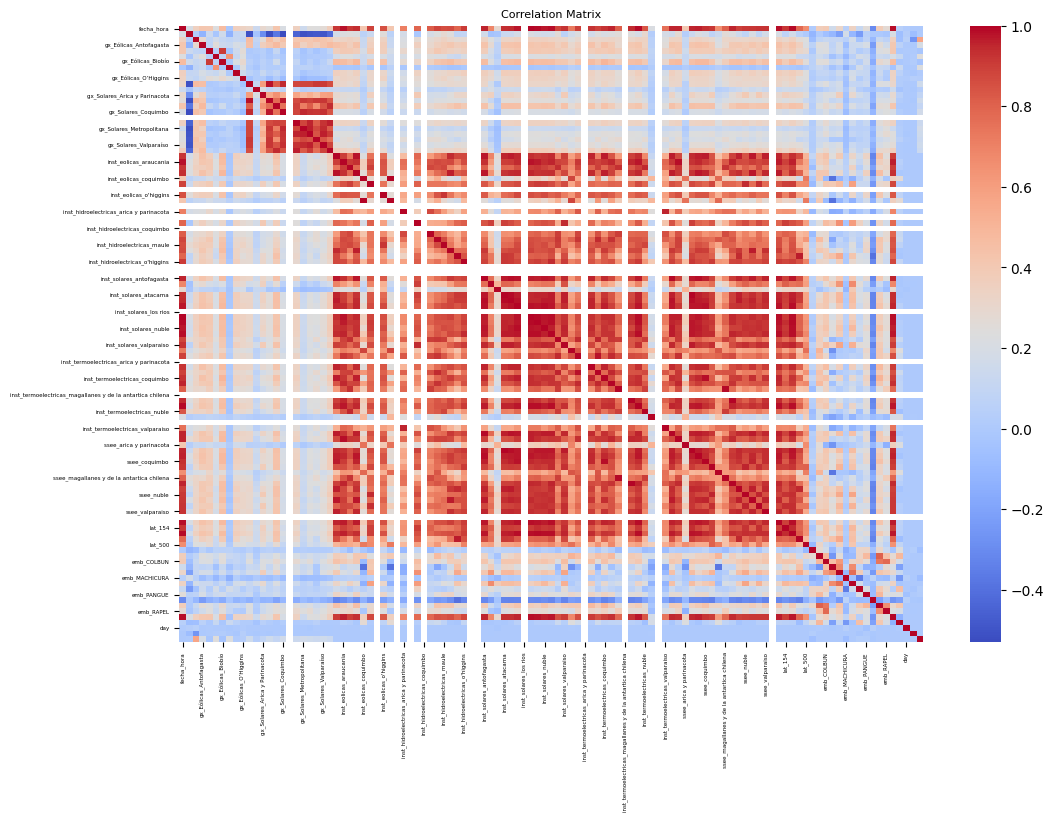

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix as a heatmap
# Plot the heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True)
# Adjust the axis font sizes
ax.tick_params(axis='x', labelsize=4)  # Font size for x-axis labels
ax.tick_params(axis='y', labelsize=4)  # Font size for y-axis labels
plt.title('Correlation Matrix', fontsize=8)
plt.show()


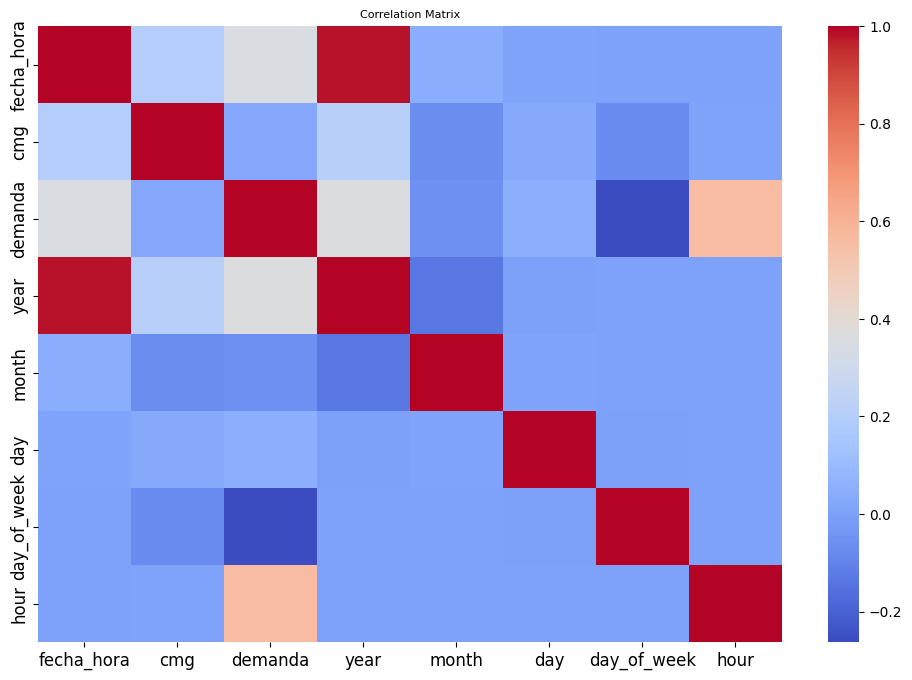

In [9]:
# Calculate the correlation matrix
correlation_matrix = data_lite.corr()

# Display the correlation matrix as a heatmap
# Plot the heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True)
# Adjust the axis font sizes
ax.tick_params(axis='x', labelsize=12)  # Font size for x-axis labels
ax.tick_params(axis='y', labelsize=12)  # Font size for y-axis labels
plt.title('Correlation Matrix', fontsize=8)
plt.show()

In [11]:
data = data_lite.copy()

# Encode categorical variables
metadata_cols = ['year', 'month', 'day', 'day_of_week', 'hour']
encoders = {col: LabelEncoder().fit(data[col]) for col in metadata_cols}
for col in metadata_cols:
    data[col] = encoders[col].transform(data[col])

# Prepare the data
target_column = 'cmg'  # Replace with the actual target column name
date_column = data['fecha_hora']
X_continuous = data.drop(columns=['fecha_hora', target_column] + metadata_cols).values
y = data[target_column].values
metadata = data[metadata_cols].values

# Split data into train, validation, and test sets
split_test_size = 0.9
split_val_size = 0.8
train_size = int(len(data) * split_val_size * split_test_size)
val_size = int(len(data) * (1 - split_val_size) * split_test_size)

X_cont_train, X_cont_val, X_cont_test = (
    X_continuous[:train_size],
    X_continuous[train_size:train_size + val_size],
    X_continuous[train_size + val_size:],
)
metadata_train, metadata_val, metadata_test = (
    metadata[:train_size],
    metadata[train_size:train_size + val_size],
    metadata[train_size + val_size:],
)
y_train, y_val, y_test = (
    y[:train_size],
    y[train_size:train_size + val_size],
    y[train_size + val_size:],
)
dt_train, dt_val, dt_test = (
    date_column[:train_size],
    date_column[train_size:train_size + val_size],
    date_column[train_size + val_size:],
)

# Normalize the continuous data
scaler = MinMaxScaler()
X_cont_train = scaler.fit_transform(X_cont_train)
X_cont_val = scaler.transform(X_cont_val)
X_cont_test = scaler.transform(X_cont_test)

# Define input layers
input_continuous = Input(shape=(X_continuous.shape[1],), name='continuous_input')
embedding_inputs = []
embeddings = []

# Create embeddings for categorical variables
for i, col in enumerate(metadata_cols):
    input_meta = Input(shape=(1,), name=f'{col}_input')
    embedding_dim = min(50, len(encoders[col].classes_) // 2 + 1)  # Heuristic for embedding size
    embedding_layer = Embedding(
        input_dim=len(encoders[col].classes_), 
        output_dim=embedding_dim, 
        input_length=1, 
        name=f'{col}_embedding'
    )(input_meta)
    flattened = Flatten()(embedding_layer)
    embedding_inputs.append(input_meta)
    embeddings.append(flattened)

# Concatenate all features
all_features = Concatenate(name='concatenated_features')([input_continuous] + embeddings)

# Add MLP layers with increased complexity
x = Dense(256, activation='relu')(all_features)
x = BatchNormalization()(x)  # Batch normalization
x = Dropout(0.4)(x)          # Increased dropout

# Add another dense layer
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Introduce a residual block
residual = Dense(128, activation='relu')(x)  # Shortcut connection
residual = BatchNormalization()(residual)
residual = Dropout(0.3)(residual)
x = Add()([x, residual])  # Add residual connection

# Further dense layers
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# Output layer
output = Dense(1, activation='linear', name='output')(x)

# Define the updated model
model = Model(inputs=[input_continuous] + embedding_inputs, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 year_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 month_input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 day_input (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 day_of_week_input (InputLa  [(None, 1)]                  0         []                            
 yer)                                                                                       

In [12]:
print(len(X_cont_train),
len(X_cont_val),
len(X_cont_test))

34657 8664 4815


In [13]:
# Prepare data for training
train_inputs = [X_cont_train] + [metadata_train[:, i] for i in range(metadata_train.shape[1])]
val_inputs = [X_cont_val] + [metadata_val[:, i] for i in range(metadata_val.shape[1])]


In [14]:
# Train the model
history = model.fit(
    train_inputs, y_train, 
    validation_data=(val_inputs, y_val), 
    epochs=300, 
    batch_size=128
)

Epoch 1/300
271/271 [==============================] - 5s 7ms/step - loss: 5722.9707 - mae: 60.9155 - val_loss: 13788.5439 - val_mae: 92.1724
Epoch 2/300
271/271 [==============================] - 2s 6ms/step - loss: 3263.5198 - mae: 47.2556 - val_loss: 6535.7622 - val_mae: 56.5412
Epoch 3/300
271/271 [==============================] - 2s 6ms/step - loss: 1712.9125 - mae: 30.9048 - val_loss: 3334.4661 - val_mae: 42.8989
Epoch 4/300
271/271 [==============================] - 2s 6ms/step - loss: 1064.8687 - mae: 20.7257 - val_loss: 3325.3699 - val_mae: 45.8681
Epoch 5/300
271/271 [==============================] - 2s 6ms/step - loss: 934.1240 - mae: 18.8397 - val_loss: 3252.9482 - val_mae: 45.0536
Epoch 6/300
271/271 [==============================] - 1s 5ms/step - loss: 891.7983 - mae: 18.4792 - val_loss: 3486.0635 - val_mae: 47.3223
Epoch 7/300
271/271 [==============================] - 1s 5ms/step - loss: 842.4727 - mae: 18.1165 - val_loss: 3270.0393 - val_mae: 44.9953
Epoch 8/300
271

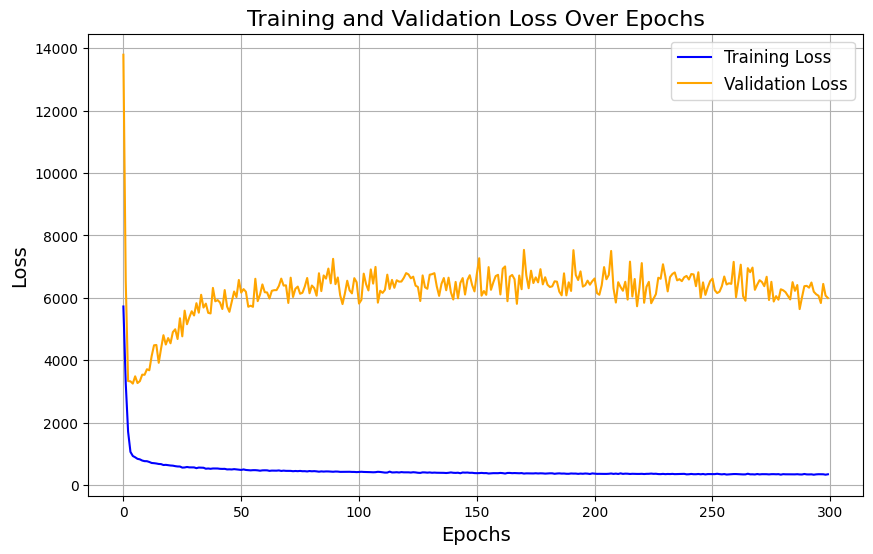

In [15]:
import matplotlib.pyplot as plt

# Extract loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [16]:
# Prepare test inputs (continuous + metadata)
test_inputs = [X_cont_test] + [metadata_test[:, i] for i in range(metadata_test.shape[1])]


# Evaluate on test data
test_loss, test_mae = model.evaluate(test_inputs, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

Test Loss: 7065.681640625, Test MAE: 54.143699645996094


In [3]:
# Generate predictions on the test set
y_pred = model.predict(test_inputs)

# Convert predictions and actual values to a DataFrame for easy comparison
import pandas as pd
results = pd.DataFrame({
    'datetime': dt_test,
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # Flatten if predictions are in 2D
})

# View the predictions
print(results.head(40))

NameError: name 'model' is not defined

In [22]:
results.to_csv("./test_results/mlp_simple.csv", index=False)

In [4]:
import pandas as pd

def calculate_kpis(
    df, datetime_col, n_hours, delta_hours, date_col='fecha_eval'
):
    """
    Generate an augmented dataset with a sliding window approach.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame.
        datetime_col (str): Column name for the datetime values.
        n_hours (int): Number of hours to select for ranking (e.g., top 6 and bottom 6).
        delta_hours (int): Size of the window in hours (e.g., 32 hours).
        date_col (str): Name of the column for unique dates (default is 'fecha_eval').
        
    Returns:
        tuple: A tuple containing:
            - Augmented dataset (pd.DataFrame).
            - Metadata DataFrame (pd.DataFrame).
    """
    # Ensure the datetime column is in datetime format
    df[datetime_col] = pd.to_datetime(df[datetime_col])
    df[date_col] = df[datetime_col].dt.date
    
    unique_dates = df[date_col].unique()
    windows = []
    windows_metadata_list = []  # List to store metadata

    for date in unique_dates:
        # Define the 32-hour window starting from 00:00 of the current day
        start_time = pd.to_datetime(date)
        end_time = start_time + pd.Timedelta(hours=delta_hours)

        # Filter data for the window
        window_data = df[
            (df[date_col] == date)
            & (df[datetime_col] >= start_time)
            & (df[datetime_col] < end_time)
        ].copy()

        # Add necessary columns
        window_data[date_col] = date
        window_data['correlative'] = range(1, len(window_data) + 1)
        window_data = window_data.assign(
            coincidence=0, charge_real=0, charge_pred=0, discharge_real=0, discharge_pred=0
        )

        # Get top and bottom hours for 'real' and 'pred'
        top_hours_real = window_data.nlargest(n_hours, 'real')['correlative'].values
        bottom_hours_real = window_data.nsmallest(n_hours, 'real')['correlative'].values
        top_hours_avg = window_data.nlargest(n_hours, 'pred')['correlative'].values
        bottom_hours_avg = window_data.nsmallest(n_hours, 'pred')['correlative'].values

        # Update columns for discharge and charge flags
        window_data.loc[window_data['correlative'].isin(top_hours_real), 'discharge_real'] = 1
        window_data.loc[window_data['correlative'].isin(top_hours_avg), 'discharge_pred'] = 1
        window_data.loc[window_data['correlative'].isin(bottom_hours_real), 'charge_real'] = 1
        window_data.loc[window_data['correlative'].isin(bottom_hours_avg), 'charge_pred'] = 1

        # Calculate coincidences
        window_data['coincidence'] = (
            (window_data['charge_real'] == window_data['charge_pred'])
            & (window_data['discharge_real'] == window_data['discharge_pred'])
        ).astype(int)

        # Calculate revenue
        window_data['revenue_real'] = (
            window_data['discharge_real'] * window_data['real']
            - window_data['charge_real'] * window_data['real']
        )
        window_data['revenue_pred'] = (
            window_data['discharge_pred'] * window_data['real']
            - window_data['charge_pred'] * window_data['real']
        )

        # Calculate factors
        factor_coincidence = window_data['coincidence'].mean()
        factor_value = (
            window_data['revenue_pred'].sum() / window_data['revenue_real'].sum()
            if window_data['revenue_real'].sum() != 0
            else 0
        )

        # Append metadata
        windows_metadata_list.append([date, factor_coincidence, factor_value])
        windows.append(window_data)

    # Combine all windows into one DataFrame
    augmented_df = pd.concat(windows, ignore_index=True)

    # Create metadata DataFrame
    metadata_df = pd.DataFrame(
        windows_metadata_list, columns=['date', 'factor_coincidence', 'factor_value']
    )

    return augmented_df, metadata_df


In [5]:
kpis = calculate_kpis(results, datetime_col='fecha_hora', n_hours=6, delta_hours=32)

NameError: name 'results' is not defined

In [27]:
dataset="../data/df_final_metadata.csv"

split=0.9
r=0.8
model_layers=[100, 200, 500, 300, 200, 100]
plt_fi=True
random_seed=100
save_test=False
ready_name=False

In [28]:
# DDA = pd.read_csv(dataset, sep=',')   
DDA = data_lite  
leng, wide = DDA.shape
print(leng, wide)

nan_rows = DDA.isnull().any(axis=1).sum()
print('Data Original {} registros. {} filas con #na'.format(leng,nan_rows))

48136 8
Data Original 48136 registros. 0 filas con #na


In [30]:
print('Rellenando #na numericos con promedios y eliminando filas con #na no numericos')
num_columns = DDA.columns[2:-5]
cat_columns = DDA.columns[-5:]

for col in cat_columns:
    # Convert numerical categories (like years) to strings first
    if pd.api.types.is_numeric_dtype(DDA[col]):
        DDA[col] = DDA[col].astype(str)
    # Then convert to categorical and set as ordered
    DDA[col] = DDA[col].astype('category').cat.as_ordered()

#Def train y test
split = split
s = int(leng*split)

print('Separando train y test datasets en proporcion', split)
DDA_Trn = DDA.iloc[:s].copy()
DDA_Tst = DDA.iloc[s:].copy()

Rellenando #na numericos con promedios y eliminando filas con #na no numericos
Separando train y test datasets en proporcion 0.9


C:\Users\gigle\AppData\Local\Temp\ipykernel_36304\2894948678.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DDA[col] = DDA[col].astype('category').cat.as_ordered()


In [31]:
DDA_Trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43322 entries, 0 to 43321
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   fecha_hora   43322 non-null  datetime64[ns]
 1   cmg          43322 non-null  float64       
 2   demanda      43322 non-null  float64       
 3   year         43322 non-null  category      
 4   month        43322 non-null  category      
 5   day          43322 non-null  category      
 6   day_of_week  43322 non-null  category      
 7   hour         43322 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(2)
memory usage: 1.2 MB


In [32]:
cmg = DDA.columns[1]

print('Label: ',cmg)
print('N° de Datos Total:', leng)
print('N° de Datos para entrenamiento:', s)
print('N° de Datos para validación:', leng-s)

Label:  cmg
N° de Datos Total: 48136
N° de Datos para entrenamiento: 43322
N° de Datos para validación: 4814


In [33]:
df = DDA_Trn.copy()
df[cmg] = df[cmg].astype(float)

np.random.seed(random_seed)

In [34]:

pot_cmg = DDA[cmg].max()

#Carga datasets
# df = pd.read_csv(path/'DataSet_Python_Train.csv', sep=',', thousands=',', decimal='.', index_col=0)
df = DDA_Trn.copy()
df[cmg] = df[cmg].astype(float)
#df_pred =  pd.read_csv(path/'DataSet_Python_Test.csv', sep=',', thousands=',', decimal='.', index_col=0)
#df_pred[cmg] = df_pred[cmg].astype(float)



# if "Hora Sol" in df.columns:
#     print("cmg Solar")
#     #TRAIN
#     cat_names = ["Date","Fecha","Year","Month","Month Day","Weekday","Yearday","Hour", "Hora Sol"]
#     cont_names = ["Index",'Temp', 'Precip', 'Vel Viento', 'Dir Viento', 'Rad Glob', 'Rad Dir', 'Rad Dif','Nubosidad']
#     #PRED
#     cat_names2 = ["Date","Fecha","Year","Month","Month Day","Weekday","Yearday","Hour", "Hora Sol"]
#     cont_names2 = ["Index",'Temp', 'Precip', 'Vel Viento', 'Dir Viento', 'Rad Glob', 'Rad Dir', 'Rad Dif','Nubosidad']
# else:
#     print("cmg Eolica")
#     #TRAIN
#     cat_names = ["Date","Fecha","Year","Month","Month Day","Weekday","Yearday","Hour"]
#     cont_names = ["Index",'Temp', 'Precip', 'Vel Viento', 'Dir Viento', 'Rad Glob', 'Rad Dir', 'Rad Dif','Nubosidad']
#     #PRED
#     cat_names2 = ["Date","Fecha","Year","Month","Month Day","Weekday","Yearday","Hour"]
#     cont_names2 = ["Index",'Temp', 'Precip', 'Vel Viento', 'Dir Viento', 'Rad Glob', 'Rad Dir', 'Rad Dif','Nubosidad']

dep_var = cmg
procs = [FillMissing, Categorify, Normalize]

print('Separando train y validation datasets en proporcion', r)

test = TabularList.from_df(df.iloc[int(len(df)*r):int(len(df))].copy(), cat_names=cat_columns, cont_names=num_columns)

data = (TabularList.from_df(df, cat_names=cat_columns, cont_names=num_columns, procs=procs)
                        .split_by_idx(list(range(int(len(df)*r),int(len(df)))))
                        .label_from_df(cols=dep_var)
                        .add_test(test)
                        .databunch())

#data_test = (TabularList.from_df(df_pred, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs))


Separando train y validation datasets en proporcion 0.8


In [35]:
model_layers

[100, 200, 500, 300, 200, 100]

Utilizando modelo <module 'fastai.layers' from 'c:\\Users\\gigle\\anaconda3\\envs\\mia\\Lib\\site-packages\\fastai\\layers.py'>


epoch,train_loss,valid_loss,root_mean_squared_error,time


c:\Users\gigle\anaconda3\envs\mia\Lib\site-packages\fastai\basic_train.py:269: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(source, map_location=device)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


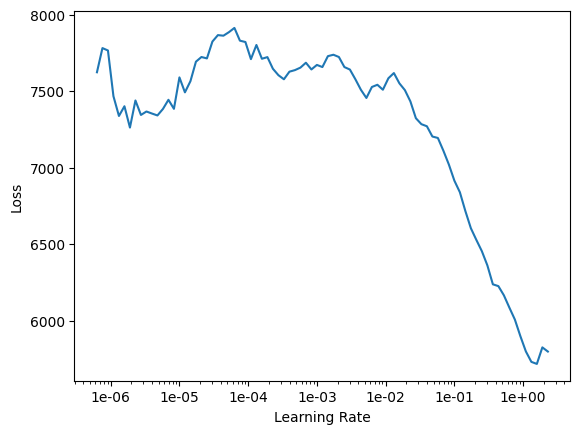

In [36]:
#Crea modelo    
# layers=layers
learn = tabular_learner(data, layers=model_layers, metrics=root_mean_squared_error)
print("Utilizando modelo", layers)

learn.lr_find()
learn.recorder.plot()
plt.show()



In [37]:
cycles=6
lr=1e-2

Entrenando 6 ciclos con un lr de 0.01


epoch,train_loss,valid_loss,root_mean_squared_error,time
0,1431.258667,3613.792480,53.316429,03:08
1,1062.658325,3019.891602,51.073353,03:15
2,962.112366,3213.832031,52.778381,03:12
3,814.568115,3460.791748,54.705467,03:12
4,707.786438,3765.368408,56.734406,03:27
5,683.040466,3443.813477,54.258621,03:13


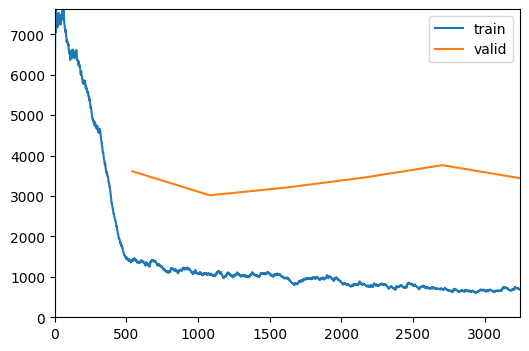

Better model found at epoch 0 with root_mean_squared_error value: 53.316429138183594.
Better model found at epoch 1 with root_mean_squared_error value: 51.0733528137207.


In [38]:
lr = lr
cycles = cycles

print("Entrenando {} ciclos con un lr de {}".format(cycles, lr))

learn.fit_one_cycle(cycles, lr, callbacks=[ShowGraph(learn), SaveModelCallback(learn, every='improvement', monitor='root_mean_squared_error', mode='min', name=cmg+"_Train")])
rmse_valid = round(float(min(learn.recorder.metrics)[0]),2)

In [ ]:
model_filename = '{}-{}-{}-{}-{}'.format(cmg, str(rmse_valid).replace('.',"_"), cycles, str(lr).replace('.',"_"), str(layers).replace(', ',"-"))

learn.save(model_filename)
learn.load(model_filename)

pklfilename = '{}.pkl'.format(model_filename)

learner_export = pklfilename
current_path = Path(os.getcwd())
learner_path = current_path / 'models'

learn.path = learner_path
learn.export(learner_export)


if plt_fi == True:
    fi = tf.feature_importance(learn, cat_columns, num_columns)
    tf.plot_fi(fi)
else:
    pass

precision = tf.test_model(cmg,learner_path, learner_export, False, pot_cmg, save_test=save_test)
precision = round(precision,2)

model_filename_final = '{}-{}'.format(model_filename,str(precision).replace('.',"_"))

pklfilename_final = '{}.pkl'.format(model_filename_final)

os.rename(Path(os.path.join(os.path.dirname(main_path),"Clientes",carpeta,pklfilename)), Path(os.path.join(os.path.dirname(main_path),"Clientes",carpeta,pklfilename_final)))    

print("Exportando pkl a {}".format(learner_path))